In [3]:
# IMPORT LIBRARY 

from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

# 随机森林, GBR, KNN, LR, Decision Tree, GNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import check_random_state
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
rs = check_random_state(4421)

In [4]:
# 数据加载和转换
# 数据读取: 

data = pd.read_csv('games.csv')

In [5]:
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   seasonId            51490 non-null  int64
 4   winner              51490 non-null  int64
 5   firstBlood          51490 non-null  int64
 6   firstTower          51490 non-null  int64
 7   firstInhibitor      51490 non-null  int64
 8   firstBaron          51490 non-null  int64
 9   firstDragon         51490 non-null  int64
 10  firstRiftHerald     51490 non-null  int64
 11  t1_champ1id         51490 non-null  int64
 12  t1_champ1_sum1      51490 non-null  int64
 13  t1_champ1_sum2      51490 non-null  int64
 14  t1_champ2id         51490 non-null  int64
 15  t1_champ2_sum1      51490 non-null  int64
 16  t1_champ2_sum2      51490 non-null  int6

In [6]:
data.drop(["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","seasonId"],axis = 1,inplace = True)

In [7]:
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameId              51490 non-null  int64
 1   creationTime        51490 non-null  int64
 2   gameDuration        51490 non-null  int64
 3   winner              51490 non-null  int64
 4   firstBlood          51490 non-null  int64
 5   firstTower          51490 non-null  int64
 6   firstInhibitor      51490 non-null  int64
 7   firstBaron          51490 non-null  int64
 8   firstDragon         51490 non-null  int64
 9   firstRiftHerald     51490 non-null  int64
 10  t1_champ1_sum1      51490 non-null  int64
 11  t1_champ1_sum2      51490 non-null  int64
 12  t1_champ2_sum1      51490 non-null  int64
 13  t1_champ2_sum2      51490 non-null  int64
 14  t1_champ3_sum1      51490 non-null  int64
 15  t1_champ3_sum2      51490 non-null  int64
 16  t1_champ4_sum1      51490 non-null  int6

In [8]:
data=data[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t1_riftHeraldKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills','t2_riftHeraldKills'
       ]]

In [9]:
X = data.drop(['winner'], axis=1)
Y = data['winner'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=rs)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [11]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [12]:
y_pred = lr.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred.round())
print("Accuracy=", accuracy_test)

Accuracy= 0.9607690813750243


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.96540   0.95689   0.96112      5219
           2    0.95610   0.96476   0.96041      5079

    accuracy                        0.96077     10298
   macro avg    0.96075   0.96082   0.96077     10298
weighted avg    0.96081   0.96077   0.96077     10298



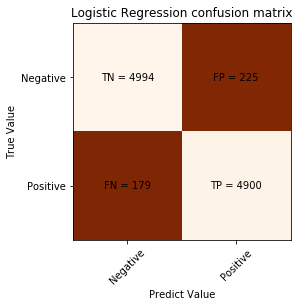

In [41]:
confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges_r)
classNames = ['Negative', 'Positive']
plt.title('Logistic Regression confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')

plt.savefig("LR_con", dpi=160, bbox_inches='tight')


In [42]:
fpr[1], tpr[1], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[1] = auc(fpr[1], tpr[1])

In [18]:
# KNN 
score = 0
precision = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    accuracy_test = accuracy_score(y_test,prediction.round())
    if (score < accuracy_test):
        y_pred = prediction
        score = knn.score(X_test, y_test)
        best = k
    precision.insert(k, knn.score(X_test, y_test))
    
print("accuracy: {0: .5f}".format(score))
print("n_neighbors:"+format(best))

accuracy:  0.96728
n_neighbors:24


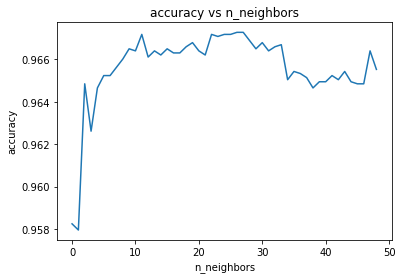

In [44]:
plt.title('accuracy vs n_neighbors')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.plot(precision)
plt.savefig("KNN",dpi=160,bbox_inches='tight')

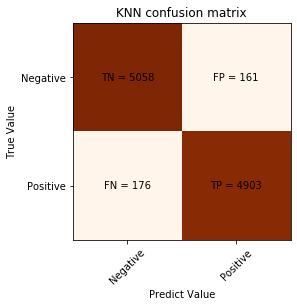

In [45]:
confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('KNN confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')


plt.savefig("KNN_con",dpi=160, bbox_inches='tight')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.96637   0.96915   0.96776      5219
           2    0.96821   0.96535   0.96678      5079

    accuracy                        0.96728     10298
   macro avg    0.96729   0.96725   0.96727     10298
weighted avg    0.96728   0.96728   0.96727     10298



In [47]:
fpr[2], tpr[2], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[2] = auc(fpr[2], tpr[2])

In [9]:
# 朴素贝叶斯:
nb = GaussianNB()
nb.fit(X_train,y_train)
prediction = nb.predict(X_test)
accuracy_test = accuracy_score(y_test,prediction.round())
print( "Accuracy (test)  =", accuracy_test )

Accuracy (test)  = 0.9362983103515246


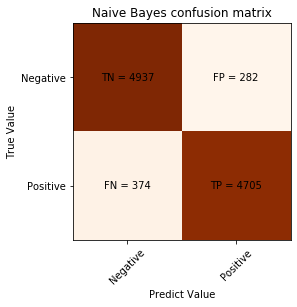

In [49]:
y_pred = nb.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('Naive Bayes confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')


plt.savefig("NB_con",dpi=160, bbox_inches='tight')

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.92958   0.94597   0.93770      5219
           2    0.94345   0.92636   0.93483      5079

    accuracy                        0.93630     10298
   macro avg    0.93652   0.93617   0.93627     10298
weighted avg    0.93642   0.93630   0.93629     10298



In [51]:
#ROC 
fpr[3], tpr[3], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[3] = auc(fpr[3], tpr[3])

In [52]:
# Decision Tree
range1 = range(2, 10)
range2 = range(1, 5)
score = 0
precision = []

for es1 in range1:
    for es2 in range2:
        dtree = DecisionTreeRegressor(random_state=rs, 
                                      min_samples_split= es1, 
                                      min_samples_leaf = es2)
        dtree.fit(X_train, y_train)
        prediction = dtree.predict(X_test)
        accuracy_test = accuracy_score(y_test, prediction.round())
        if(score < accuracy_test):
            y_pred = prediction
            score = accuracy_test
            best1 = es1
            best2 = es2
        precision.insert(es1, accuracy_test)

print("Precision: {0: .5f}".format(score))
print("min_samples_split: " +format(best1))
print("min_samples_leaf: " +format(best2))

Precision:  0.96407
min_samples_split: 7
min_samples_leaf: 4


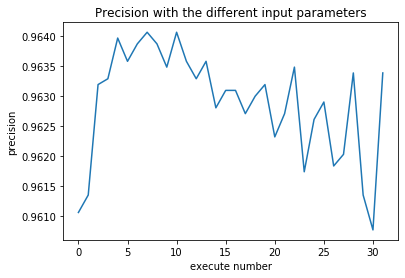

In [53]:
from sklearn.model_selection import GridSearchCV

plt.title('Precision with the different input parameters')
plt.ylabel('precision')
plt.xlabel('execute number')
plt.plot(precision)
plt.savefig("DT",dpi=160,bbox_inches='tight')

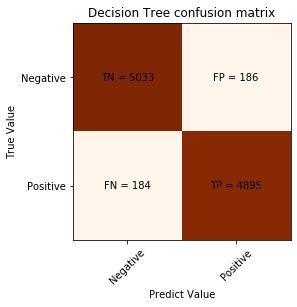

In [54]:
y_pred = y_pred.round()

confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('Decision Tree confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')

plt.savefig("DT-con",dpi=160,bbox_inches='tight')

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt2=DecisionTreeClassifier(criterion="gini",max_depth=8, splitter="best")
dt2.fit(X_train,y_train)
print("score:", dt2.score(X_test,y_test))

score: 0.9670809865993397


In [56]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=X.columns,class_names=["1","2"], 
                     filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.view()

'Source.gv.pdf'

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.96473   0.96436   0.96455      5219
           2    0.96339   0.96377   0.96358      5079

    accuracy                        0.96407     10298
   macro avg    0.96406   0.96407   0.96406     10298
weighted avg    0.96407   0.96407   0.96407     10298



In [58]:
#ROC 
fpr[4], tpr[4], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[4] = auc(fpr[4], tpr[4])

In [59]:
#SVM - rbf
from sklearn.svm import SVC 

rbf = SVC(gamma=0.1,probability=True)
rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [60]:
y_pred = rbf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred.round())
print("Accuracy=", accuracy_test)

Accuracy= 0.9709652359681492


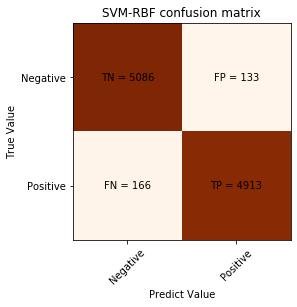

In [61]:
confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('SVM-RBF confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')

plt.savefig("rbf-con",dpi=160,bbox_inches='tight')

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.96839   0.97452   0.97144      5219
           2    0.97364   0.96732   0.97047      5079

    accuracy                        0.97097     10298
   macro avg    0.97102   0.97092   0.97096     10298
weighted avg    0.97098   0.97097   0.97096     10298



In [63]:
#ROC 
fpr[5], tpr[5], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[5] = auc(fpr[5], tpr[5])

In [66]:
# Random Forest
score = 0
precision = []

for n in range(1,500):
    rnf = RandomForestClassifier(n_estimators=n, random_state=rs)
    rnf.fit(X_train, y_train)
    prediction = rnf.predict(X_test)
    accuracy_test = accuracy_score(y_test, prediction.round())
    if (score<accuracy_test):
        y_pred = prediction
        score = accuracy_test
        pos = n
    precision.insert(n, accuracy_test)

print("precision: {0: .9f}".format(score))
print("n_estimators:"+format(pos))

precision:  0.971450767
n_estimators:158


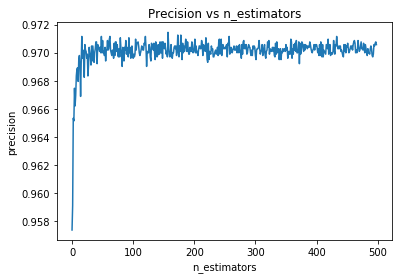

In [68]:
plt.title('Precision vs n_estimators')
plt.ylabel('precision')
plt.xlabel('n_estimators')
plt.plot(precision)
plt.savefig('RF',dpi=160,bbox_inches='tight')

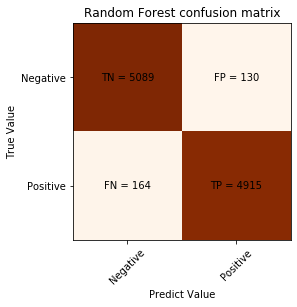

In [69]:
confusion = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Oranges)
classNames = ['Negative', 'Positive']
plt.title('Random Forest confusion matrix')
plt.ylabel('True Value')
plt.xlabel('Predict Value')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN','TP']]
s = [['TN', 'FP'], ['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), 
                 horizontalalignment='center', verticalalignment='center')


plt.savefig("RF_con",dpi=200, bbox_inches='tight')

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.96878   0.97509   0.97193      5219
           2    0.97423   0.96771   0.97096      5079

    accuracy                        0.97145     10298
   macro avg    0.97151   0.97140   0.97144     10298
weighted avg    0.97147   0.97145   0.97145     10298



In [71]:
fpr[6], tpr[6], _ = roc_curve(y_test, y_pred,pos_label=2)
roc_auc[6] = auc(fpr[6], tpr[6])

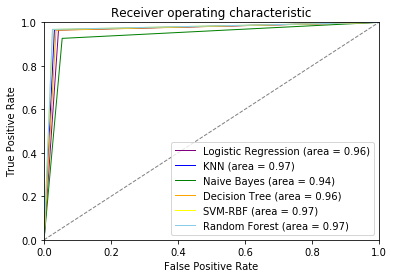

In [77]:
# ROC Curve
plt.figure()
lw = 1

plt.plot(fpr[1], tpr[1], color='purple',lw=lw, label='Logistic Regression (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='blue',lw=lw, label='KNN (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3], color='green',lw=lw, label='Naive Bayes (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4], color='orange',lw=lw, label='Decision Tree (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5], color='yellow',lw=lw, label='SVM-RBF (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6], color='skyblue',lw=lw, label='Random Forest (area = %0.2f)' % roc_auc[6])


plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig("ROC",dpi=160,bbox_inches='tight')
plt.show()

In [14]:
predictor={"feature":["first_blood","first_tower","first_inhibitor","first_Baron","first_Dragon","first_RiftHerald",
"t1_tower","t1_inhibitor","t1_baron","t1_dragon","t1_riftHeraldKills", "t2_tower","t2_inhibitor","t2_baron","t2_dragon","t2_riftHeraldKills"],
         "value":[1,1,2,1,1,1,10,2,3,1,1,7,2,1,1,1]}
scena=pd.DataFrame(predictor)
scena



,feature,value
0,first_blood,1
1,first_tower,1
2,first_inhibitor,2
3,first_Baron,1
4,first_Dragon,1
5,first_RiftHerald,1
6,t1_tower,10
7,t1_inhibitor,2
8,t1_baron,3
9,t1_dragon,1


In [15]:
x1=[[1,1,2,1,1,1,10,2,3,1,1,7,2,1,1,1]]
c= lr.predict_proba(x1).reshape(-1,1)
print("winner is :" , lr.predict(x1) )
print("first team win probability is % ", list(c[0]*100),
      "\nsecond team win probability is %:",list(c[1]*100))

winner is : [1]
first team win probability is %  [99.0893219771051] 
second team win probability is %: [0.9106780228949072]


In [17]:
x1=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
c= lr.predict_proba(x1).reshape(-1,1)
print("winner is :" , lr.predict(x1) )
print("first team win probability is % ", list(c[0]*100),
      "\nsecond team win probability is %:",list(c[1]*100))

winner is : [1]
first team win probability is %  [51.44746566225702] 
second team win probability is %: [48.55253433774298]
